# Tugas
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah yang terbaik.
4. Buatlah implementasi model SOM untuk segmentasi citra lain

In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# Load Dataset
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Memilih dua fitur 'Annual Income (k$)' dan 'Spending Score (1-100)' dari DataFrame df
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]    

# Melakukan normalisasi data dengan mengurangi rata-rata dan membagi dengan standar deviasi dari setiap fitur dalam X
X_norm = (X - X.mean()) / X.std()    

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

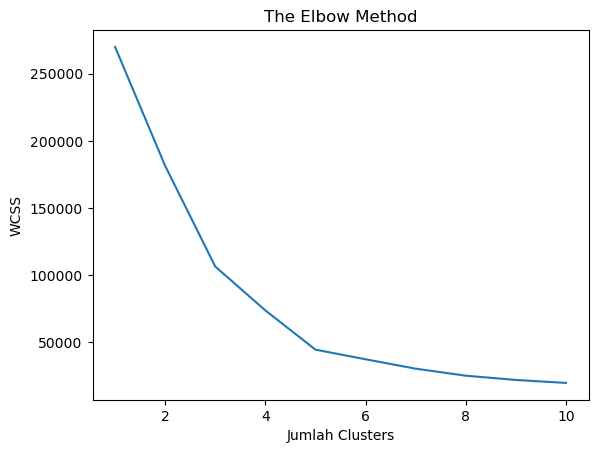

In [7]:
# Mengambil kolom ke-3 (Annual Income) dan ke-4 (Spending Score) dari DataFrame df dan mengubahnya menjadi array numpy
data = df.iloc[:, [3, 4]].values    

# Mengimpor kelas KMeans dari modul sklearn.cluster
from sklearn.cluster import KMeans    
# Membuat list kosong untuk menyimpan nilai WCSS (within-cluster sum of squares)
wcss = []    

# Melakukan iterasi dari 1 hingga 10 untuk mencoba berbagai jumlah cluster
for i in range(1, 11):    
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)    # Membuat objek KMeans dengan jumlah cluster i, inisialisasi 'k-means++', dan nilai seed random_state=0
    kmeans.fit(data)    # Melakukan clustering pada data menggunakan metode fit dari objek KMeans
    wcss.append(kmeans.inertia_)    # Menyimpan nilai WCSS (inertia_) dari model KMeans saat ini ke dalam list wcss

# Mengimpor modul matplotlib.pyplot untuk visualisasi data
import matplotlib.pyplot as plt    
plt.plot(range(1, 11), wcss)    # Menggambar plot jumlah cluster terhadap WCSS
plt.title('The Elbow Method')    # Memberikan judul plot
plt.xlabel('Jumlah Clusters')    # Memberikan label sumbu x
plt.ylabel('WCSS')    # Memberikan label sumbu y
plt.show()    # Menampilkan plot

In [8]:
# Membuat objek KMeans dengan jumlah cluster 5
kmeans = KMeans(n_clusters=5)    

# Melakukan clustering pada data yang telah dinormalisasi (X_norm) dengan memanggil metode fit dari objek KMeans
kmeans.fit(X_norm)    

# Menyimpan hasil clustering dalam variabel labels
labels = kmeans.labels_    

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


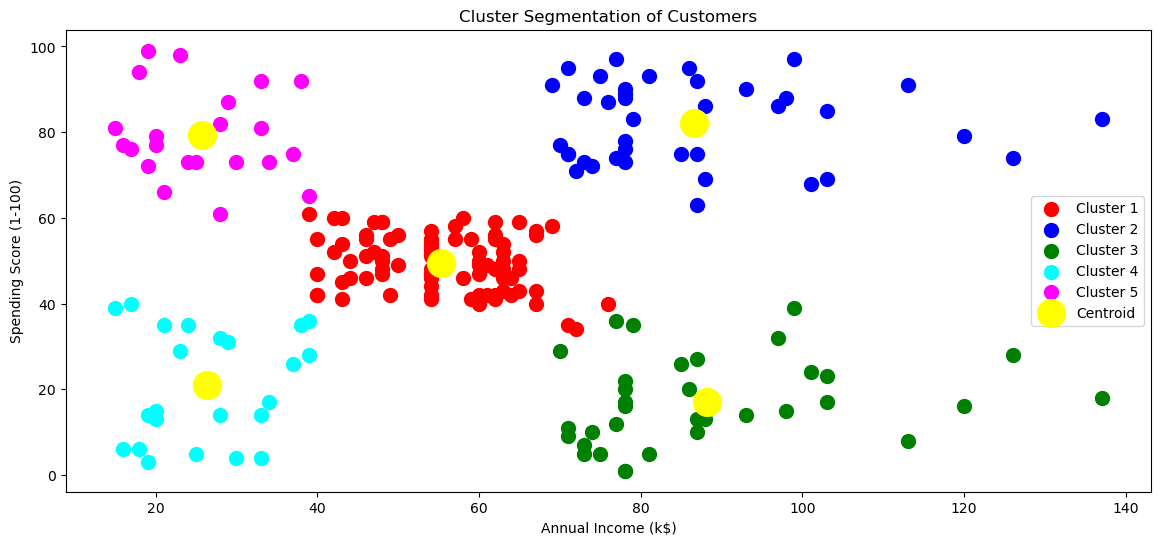

In [9]:
# Membuat objek KMeans dengan jumlah cluster 5, inisialisasi 'k-means++', dan nilai seed random_state=0
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)    
# Melakukan clustering pada data dengan memanggil metode fit_predict dari objek KMeans
y_kmeans = kmeans.fit_predict(data)    

# Plotting the clusters
# Membuat figure dan axes untuk plot dengan ukuran 14x6
fig, ax = plt.subplots(figsize=(14, 6))    
# Scatter plot untuk cluster 1 dengan warna merah
ax.scatter(data[y_kmeans==0, 0], data[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')    
# Scatter plot untuk cluster 2 dengan warna biru
ax.scatter(data[y_kmeans==1, 0], data[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')    
# Scatter plot untuk cluster 3 dengan warna hijau
ax.scatter(data[y_kmeans==2, 0], data[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')    
# Scatter plot untuk cluster 4 dengan warna cyan
ax.scatter(data[y_kmeans==3, 0], data[y_kmeans==3, 1], s=100, c='cyan', label='Cluster 4')    
# Scatter plot untuk cluster 5 dengan warna magenta
ax.scatter(data[y_kmeans==4, 0], data[y_kmeans==4, 1], s=100, c='magenta', label='Cluster 5')    

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='yellow', label='Centroid')    # Scatter plot untuk pusat cluster dengan warna kuning
plt.title('Cluster Segmentation of Customers')    # Memberikan judul plot
plt.xlabel('Annual Income (k$)')    # Memberikan label sumbu x
plt.ylabel('Spending Score (1-100)')    # Memberikan label sumbu y
plt.legend()    # Menampilkan legenda
plt.show()    # Menampilkan plot

K-Means Age

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

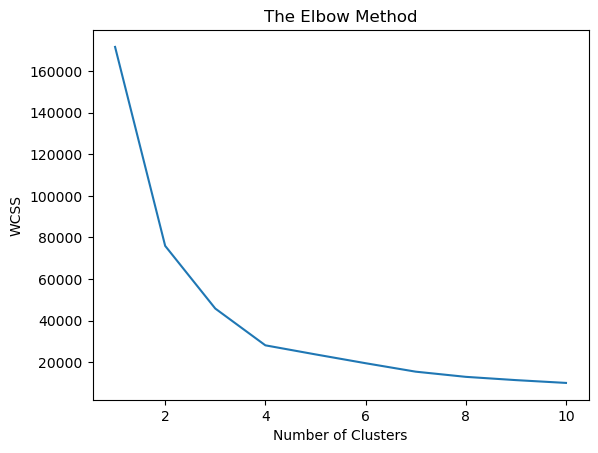

In [10]:
# Mengambil data dari kolom 2 (fitur Annual Income) dan 4 (fitur Spending Score) dari dataframe df
data = df.iloc[:, [2, 4]].values    

# Mengimpor kelas KMeans dari modul sklearn.cluster
from sklearn.cluster import KMeans    
# Membuat list kosong untuk menyimpan nilai WCSS (within-cluster sum of squares)
wcss = []    

# Melakukan iterasi dari 1 hingga 10
for i in range(1, 11):    
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)    # Membuat objek KMeans dengan jumlah cluster i, inisialisasi 'k-means++', dan nilai seed random_state=0
    kmeans.fit(data)    # Melakukan clustering pada data dengan memanggil metode fit dari objek KMeans
    wcss.append(kmeans.inertia_)    # Menyimpan nilai WCSS (inertia_) dari model KMeans ke dalam list wcss

# Plotting nilai WCSS untuk setiap jumlah cluster
plt.plot(range(1, 11), wcss)    
plt.title('The Elbow Method')    # Memberikan judul plot
plt.xlabel('Number of Clusters')    # Memberikan label sumbu x
plt.ylabel('WCSS')    # Memberikan label sumbu y
plt.show()    # Menampilkan plot

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


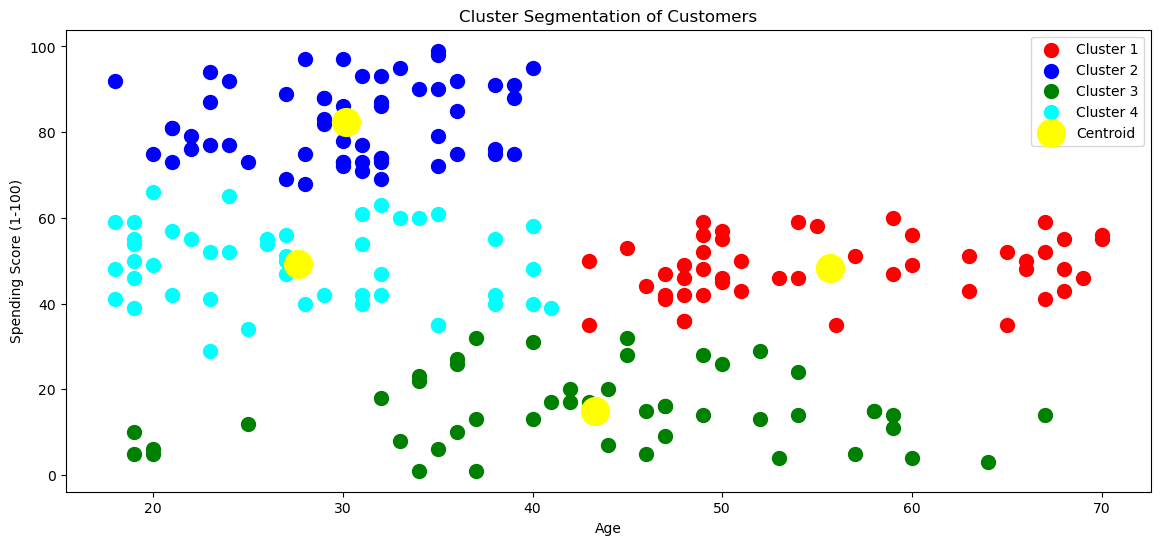

In [11]:
# Membuat objek KMeans dengan jumlah cluster 4, inisialisasi 'k-means++', dan nilai seed random_state=0
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)    
# Melakukan clustering pada data dengan memanggil metode fit_predict dari objek KMeans
y_kmeans = kmeans.fit_predict(data)    

# Plotting the clusters
# Membuat figure dan axes untuk plot dengan ukuran 14x6
fig, ax = plt.subplots(figsize=(14, 6))    
# Scatter plot untuk cluster 1 dengan warna merah
ax.scatter(data[y_kmeans==0, 0], data[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')    
# Scatter plot untuk cluster 2 dengan warna biru
ax.scatter(data[y_kmeans==1, 0], data[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')    
# Scatter plot untuk cluster 3 dengan warna hijau
ax.scatter(data[y_kmeans==2, 0], data[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')    
# Scatter plot untuk cluster 4 dengan warna cyan
ax.scatter(data[y_kmeans==3, 0], data[y_kmeans==3, 1], s=100, c='cyan', label='Cluster 4')    

# Scatter plot untuk pusat cluster dengan warna kuning
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='yellow', label='Centroid')    
plt.title('Cluster Segmentation of Customers')    # Memberikan judul plot
plt.xlabel('Age')    # Memberikan label sumbu x
plt.ylabel('Spending Score (1-100)')    # Memberikan label sumbu y
plt.legend()    # Menampilkan legenda
plt.show()    # Menampilkan plot

SOM

In [12]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [13]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [14]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [15]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [16]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [17]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [21]:
# Load citra (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Ktp_path = "data/ktp-dummy.jpg"
Ktp = io.imread(Ktp_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Ktp, num_epochs, initial_learning_rate, initial_neighborhood_radius)

In [ ]:
# Visualisasi bobot SOM
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Ktp)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for KTP Dummy')
plt.show()